![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Análisis de sentimientos y técnicas de NLP

En este taller podrán poner en práctica sus conocimientos sobre las diferentes técnicas para el procesamiento de lenguaje natural. El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción sentimientos de viajeros en Twitter

En este taller se usará el conjunto de datos de sentimientos sobre distintas aerolíneas de EE.UU. provenientes de Twitter. Cada observación contiene si el sentimiento de los tweets es positivo, neutral o negativo teniendo en cuenta distintas variables como aerolínea y las razones de los sentimientos negativos (como "retraso en el vuelo" o "servicio grosero"). El objetivo es predecir el sentimiento asociado a cada tweet. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/crowdflower/twitter-airline-sentiment).

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importación de librerías
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
# Lectura de la información de archivo .zip
tweets = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/Tweets.zip', index_col=0)

# Visualización dataset
tweets.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
tweet_id,,,,,,,,,,,,,,
570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14640 entries, 570306133677760513 to 569587140490866689
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   airline_sentiment             14640 non-null  object 
 1   airline_sentiment_confidence  14640 non-null  float64
 2   negativereason                9178 non-null   object 
 3   negativereason_confidence     10522 non-null  float64
 4   airline                       14640 non-null  object 
 5   airline_sentiment_gold        40 non-null     object 
 6   name                          14640 non-null  object 
 7   negativereason_gold           32 non-null     object 
 8   retweet_count                 14640 non-null  int64  
 9   text                          14640 non-null  object 
 10  tweet_coord                   1019 non-null   object 
 11  tweet_created                 14640 non-null  object 
 12  tweet_location                9907 

In [ ]:
# Impresión tamaño del cojunto de datos
tweets.shape

(14640, 14)

### Análisis descriptivo

In [ ]:
# Cuenta de tweets por cada sentimiento
tweets['airline_sentiment'].value_counts()

airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64

In [ ]:
# Cuenta de tweets por cada aerolínea
tweets['airline'].value_counts()

airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: count, dtype: int64

<Axes: title={'center': 'Sentiminetos por aerolínea'}, xlabel='airline'>

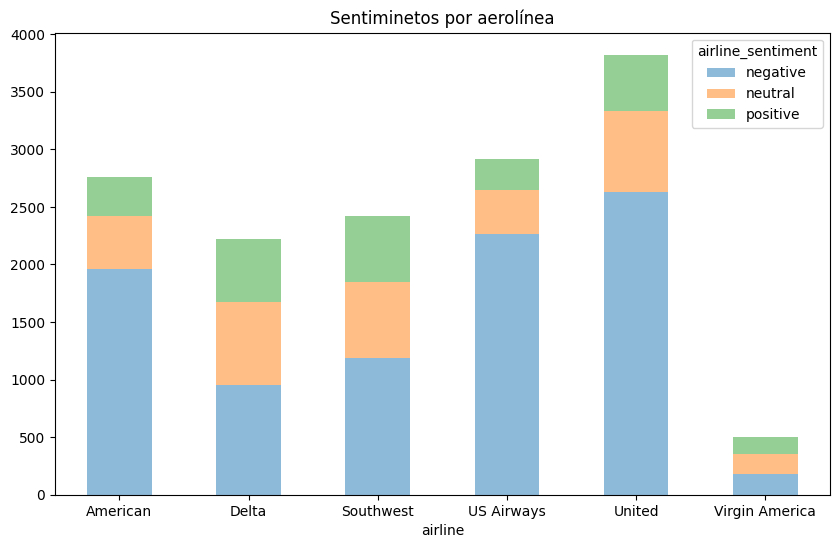

In [ ]:
# Plot con cuenta de tweets por cada aerolínea y sentimiento
pd.crosstab(index = tweets["airline"],columns = tweets["airline_sentiment"]).plot(kind='bar',figsize=(10, 6),alpha=0.5,rot=0,stacked=True,title="Sentiminetos por aerolínea")

**Conclusiones:**

Al analizar los sentimientos expresados en los tweets sobre diferentes aerolíneas de EE.UU., se observa una tendencia muy marcada hacia los sentimientos negativos. Las aerolíneas United y US Airways son las que reciben la mayor cantidad de tweets negativos y son las mas mencionadas, con 2633 y 2263 respectivamente. Esto indica una alta proporción de experiencias negativas sobre estas aerolíneas específicas.

Por otro lado, las aerolíneas Delta, Southwest y American muestran una distribución más equilibrada de sentimientos, con un número importante de tweets neutrales y positivos, aunque también tienen tweets negativos, la proporción de sentimientos neutrales y positivos es más alta en comparación con United y US Airways.

Por último, Virgin America, aunque menos mencionada en general, muestra una distribución similar a Delta, Southwest y American, con un número importante de tweets neutrales y positivos en comparación con los negativos.

### Liberias y Variables de interés y predicción

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from sklearn import metrics

In [ ]:
# Separación de variables predictoras (X) y de variable de interés (y)
X = tweets['text']
y = tweets['airline_sentiment'].map({'negative':-1,'neutral':0,'positive':1})

In [ ]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Punto 1 - Uso de CountVectorizer

En la celda 1 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

Mejor N-Estimator: 30
El accuracy del RF es de:  0.7553807947019867


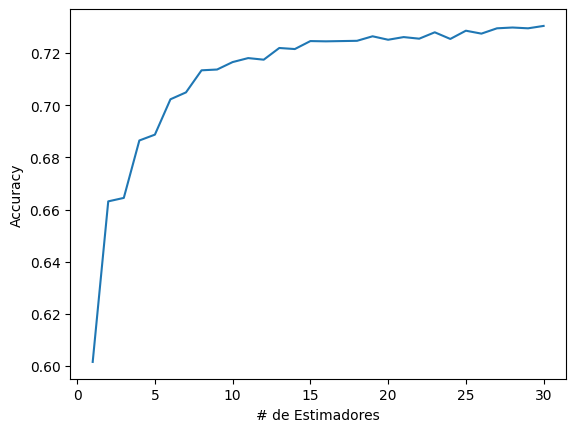

In [ ]:
# Celda 1
vect_1 = CountVectorizer(lowercase=False)
X_train_vect = vect_1.fit_transform(X_train)

# Se estima el mejor parametro para el número de estimadores a usar en el modelo random forest
acc = []
for i in range(1,31):
    modeloRF = RandomForestClassifier(n_estimators=i, random_state=42)
    acc.append(cross_val_score(modeloRF, X_train_vect, y_train, cv=4, scoring='accuracy').mean())

best_n_estimator = np.argmax(acc)

print("Mejor N-Estimator: " + str(best_n_estimator+1))

plt.plot(range(1,31), acc)
plt.xlabel('# de Estimadores')
plt.ylabel('Accuracy')

modeloRF = RandomForestClassifier(n_estimators=best_n_estimator+1, random_state=42)
modeloRF.fit(X_train_vect, y_train)

y_pred = modeloRF.predict(vect_1.transform(X_test))

RF_accuracy_1 = metrics.accuracy_score(y_pred, y_test)
print("El accuracy del RF es de: ", RF_accuracy_1)

**Análisis Punto 1 - Uso de CountVectorizer**

En primer lugar se crea un vector donde todos sus componentes se transforman en minusculas para evitar problemas con respecto a la diferencia entre mayusculas y minusculas. Posteriormente, se pasan los datos de entrenamiento al vector previamente creado para poder obtener una matriz resultante donde se encuentran los términos y la frecuencia de cada término en el texto. Luego se crea el modelo de random forest donde se itera el número de estimadores para así poder encontrar la cantidad de estimadores a usar que optimizen el desempéño del modelo. A partir de esto se gráfica el Accuracy obtenido según el número de estimadores utilizados en el modelo, en la cual se evidencia que usar 30 estimadores es el valor óptimo a utilizar ya que los valores mayores no generan una mejoría significativa en el desempeño del modelo, más sin embargo si le adicionan complejidad al modelo. Finalmente, se realiza otra vez el modelo de Random Forest con 30 estimadores y se obtiene un Accuracy de 0.7553 lo que indica que el 75.53% de las predicciones se realizaron correctamente lo que significa que el modelo tiene un buen desempeño predictivo.

### Punto 2 - Eliminación de Stopwords

En la celda 2 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer, **eliminen stopwords** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

Mejor N-Estimators: 28
El accuracy del RF quitando las stop words es de:  0.7543460264900662


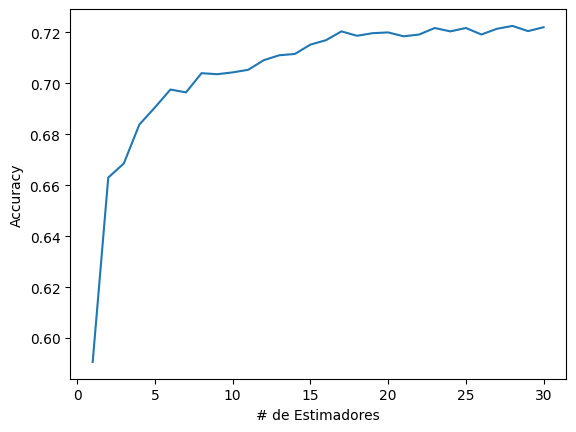

In [ ]:
# Celda 2
vect_2 = CountVectorizer(lowercase=False,stop_words='english')
X_train_sw = vect_2.fit_transform(X_train)

# Se estima el mejor parametro para el número de estimadores a usar en el modelo de random forest
acc = []
for i in range(1,31):
    modeloRF_SW = RandomForestClassifier(n_estimators=i, random_state=42)
    acc.append(cross_val_score(modeloRF_SW, X_train_sw, y_train, cv=4, scoring='accuracy').mean())

best_n_estimator = np.argmax(acc)

print("Mejor N-Estimators: " + str(best_n_estimator+1))

plt.plot(range(1,31), acc)
plt.xlabel('# de Estimadores')
plt.ylabel('Accuracy')

modeloRF_SW = RandomForestClassifier(n_estimators=best_n_estimator+1, random_state=42)
modeloRF_SW.fit(X_train_sw, y_train)

y_pred_sw = modeloRF_SW.predict(vect_2.transform(X_test))

RF_accuracy_sw_2 = metrics.accuracy_score(y_pred_sw, y_test)
print("El accuracy del RF quitando las stop words es de: ", RF_accuracy_sw_2)

**Análisis Punto 2 - Eliminación de Stopwords**

Se realizó el mismo procedimiento que en el punto anterior pero en este caso se utilizo el parámetro "stop_words" ya que el texto se encuentra en inglés por lo que hay varios problemas conocidos con este idioma. Lo que realiza este parámetro es que hay palabras que se consideran vacías, que son palabras como “and”, “him”, “the”, que no se consideran como informativas al representar el contenido de un texto y que pueden eliminarse para evitar que se interpreten como una señal de predicción. Posteriormente se creo nuevamente el modelo de random forest donde se itera el número de estimadores para así poder encontrar la cantidad de estimadores a usar que optimizen el desempéño del modelo. A partir de esto se gráfica el Accuracy obtenido según el número de estimadores utilizados en el modelo, en la cual se evidencia que usar 28 estimadores es el valor óptimo a utilizar ya que los valores mayores no generan una mejoría significativa en el desempeño del modelo, más sin embargo si le adicionan complejidad al modelo. Finalmente, se realiza otra vez el modelo de Random Forest con 28 estimadores y se obtiene un Accuracy de 0.7543 lo que indica que el 75.43% de las predicciones se realizaron correctamente lo que significa que el modelo tiene un buen desempeño predictivo. Además, respecto al punto anterior, es posible concluir que a pesar de no tener un mayor accuracy la diferencia es minima, pero en relacion a la cantidad de estimadores sera menor, resultando en menor tiempo de entrenamiento.

### Punto 3 - Lematización con verbos

En la celda 3 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer, **lematizen el texto con verbos** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Mejor N-Estimators: 38
El accuracy del RF quitando las stop words es de:  0.7522764900662252


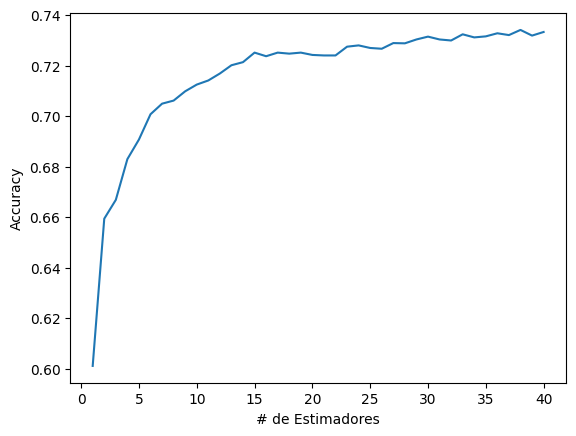

In [ ]:
# Celda 3
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
import nltk
nltk.download('wordnet')

def split_into_lemmas(text):
    text = text.lower()
    words = text.split()
    return [wordnet_lemmatizer.lemmatize(word) for word in words]

vect_3 = CountVectorizer(lowercase=False,analyzer=split_into_lemmas)
X_train_wl = vect_3.fit_transform(X_train)

# Se estima el mejor parametro para el número de estimadores a usar en el modelo de random forest
acc = []
for i in range(1,41):
    modeloRF_SW = RandomForestClassifier(n_estimators=i, random_state=42)
    acc.append(cross_val_score(modeloRF_SW, X_train_wl, y_train, cv=4, scoring='accuracy').mean())

best_n_estimator = np.argmax(acc)
print("Mejor N-Estimators: " + str(best_n_estimator+1))

plt.plot(range(1,41), acc)
plt.xlabel('# de Estimadores')
plt.ylabel('Accuracy')

modeloRF_SW = RandomForestClassifier(n_estimators=best_n_estimator+1, random_state=42)
modeloRF_SW.fit(X_train_wl, y_train)

y_pred_wl = modeloRF_SW.predict(vect_3.transform(X_test))

RF_accuracy_sw_3 = metrics.accuracy_score(y_pred_wl, y_test)
print("El accuracy del RF quitando las stop words es de: ", RF_accuracy_sw_3)

**Analisis Punto 3 - Lematización**

Se implemento un modelo de clasificación de sentimientos en tweets utilizando Random Forest, CountVectorizer y lematización de verbos.

Durante el entrenamiento, exploramos varios números de estimadores y seleccionamos aquel que maximizara el Accuracy del modelo, siendo 38 el valor optimo de los estimadores. En la evaluación con datos de Test, logramos un accuracy del 75.22%.

La lematización proporcionó una representación más precisa de las palabras, lo que ayudó al modelo a capturar mejor las relaciones semánticas y mejorar su capacidad predictiva. Pero tambien se puede ver de que el valor optimo se encuentra con 38 estimadores, lo cual repercute en los tiempos de entranamiento del modelo, comparando con el modelo del punto 1 no mejora el accuracy.

### Punto 4 - Multiples técnicas

En la celda 4 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer, eliminen stopwords, lematizen el texto con verbos** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

Mejor N-Estimators: 1
El accuracy del RF quitando las stop words es de:  0.7520695364238411


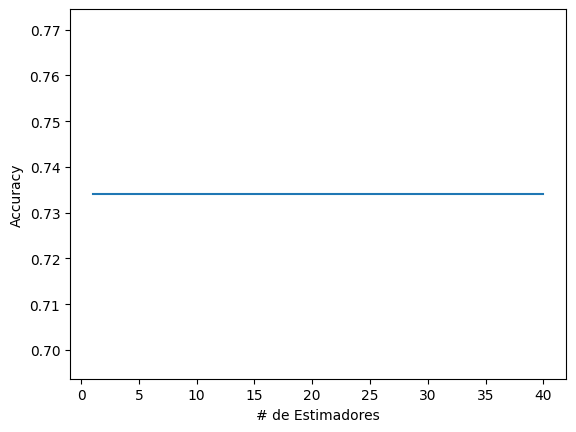

In [ ]:
# Celda 4
vect_4 = CountVectorizer(lowercase=False,analyzer=split_into_lemmas,stop_words='english')
X_train_swl = vect_4.fit_transform(X_train)

# Se estima el mejor parametro para el número de estimadores a usar en el modelo de random forest
acc = []
for i in range(1,41):
    modeloRF_SWL = RandomForestClassifier(n_estimators=i, random_state=42)
    acc.append(cross_val_score(modeloRF_SW, X_train_swl, y_train, cv=4, scoring='accuracy').mean())

best_n_estimator = np.argmax(acc)
print("Mejor N-Estimators: " + str(best_n_estimator+1))

plt.plot(range(1,41), acc)
plt.xlabel('# de Estimadores')
plt.ylabel('Accuracy')

modeloRF_SW = RandomForestClassifier(n_estimators=best_n_estimator+1, random_state=42)
modeloRF_SWL.fit(X_train_swl, y_train)

y_pred_wl = modeloRF_SWL.predict(vect_4.transform(X_test))

RF_accuracy_sw_4 = metrics.accuracy_score(y_pred_wl, y_test)
print("El accuracy del RF quitando las stop words es de: ", RF_accuracy_sw_4)

**Analisis Punto 4 - Eliminacion de StopWors y Lematizacion**

Esta implementación combina Random Forest como lo hemos aplicado anteriormente, con eliminacion de stopwords y lematizacion.

Durante el entrenamiento, realizamos una búsqueda del mejor número de estimadores para el Random Forest, utilizando validación cruzada para evaluar diferentes opciones y selecionar el número óptimo de estimadores que maximizaba el accuracy del modelo, el cual sorprendente es que se mantiene constante el accuracy desde 1 estimador hasta 40 estimadores.

Al evaluar el modelo entrenado en datos de test, observamos un accuracy del 75.20%. Este resultado es bueno, ya que indica que el modelo es capaz de clasificar correctamente aproximadamente el 75.20% de los tweets sobre aerolíneas en el conjunto de prueba.

El hecho que el accuracy optimo sea constante por ende tendremos el optimo en 1 estimador, resultando en menor tiempo de entrenamiento en comparacion con los otros modelos junto con una mayor robustez del modelo.

### Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos (random forest) y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

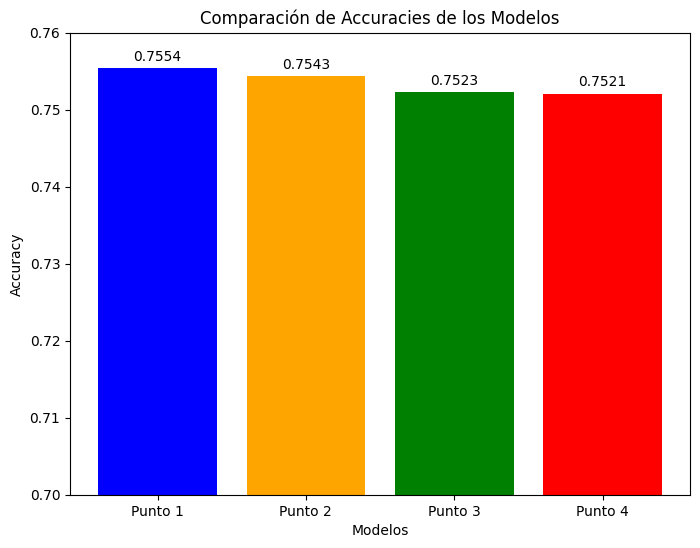

In [ ]:
# Celda 5
accuracies = [RF_accuracy_1, RF_accuracy_sw_2, RF_accuracy_sw_3, RF_accuracy_sw_4]

models = ['Punto 1', 'Punto 2', 'Punto 3', 'Punto 4']

plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Modelos')
plt.ylabel('Accuracy')
plt.title('Comparación de Accuracies de los Modelos')
plt.ylim(0.7, 0.76)

for i in range(len(accuracies)):
    plt.text(i, accuracies[i] + 0.001, f'{accuracies[i]:.4f}', ha='center')

plt.show()

**Comparación de los 4 Modelos:**

+ **Modelo 1:** Se aplico CountVectorizer sin eliminar stopwords ni lematización, con un accuracy de 75.53%
* **Modelo 2:** Se aplico CountVectorizer con eliminación de stopwords, sin lematización, con un accuracy de 75.43%.
* **Modelo 3:** Se aplico CountVectorizer con lematización de verbos, sin eliminación de stopwords, alcanzando un accuracy de 75.22%.
* **Modelo 4:** Se aplico CountVectorizer con eliminación de stopwords y lematización de verbos, con un accuracy de 75.20%.

El mejor modelo teniendo en cuenta no solo el accuracy sino tambien menor tiempo de entranamiento, uso adecaudo de recursos computacionales y robustez es el modelo # 4 (punto 4).

A pesar de que el modelo 1 (punto 1) tiene un mejor accuracy el modelo # 4 varia en apenas 0.33% que no es tan significativo, pero gano mayor robustez, eficiencia en recursos, robustez del modelo al mantener el accuracy constante a pesar de ajustar el hiperparametro de los estimadores y por ultimo un menor tiempo de entrenamiento en consideracion a los otros modelos.

**Ventajas del Mejor Modelo (Mejor desempeño) (Modelo 4):**

 * La eliminación de stopwords ayuda a reducir el ruido y a enfocar el modelo 4 en las palabras más relevantes para la clasificación de sentimientos.
 * Un accuracy constante indica que el modelo 4 es robusto frente a cambios en el número de estimadores.
 * No es necesario utilizar un número excesivo de árboles, solo 1 estimador en el bosque, lo que hace que el modelo sea más eficiente en términos de recursos computacionales y memoria.
 * El modelo 4 puede generalizar bien los patrones en los datos independientemente del número de árboles utilizados.

**Desventajas del Modelo con el Menor Desempeño (Modelo 3):**

El Modelo 3 obtuvo el accuracy más bajo de 0.7522, lo que sugiere una capacidad ligeramente menor a los otros modelos para clasificar correctamente los sentimientos.

La falta de preprocesamiento adicional, como la eliminación de stopwords y la lematización, podría haber afectado la capacidad del modelo para capturar las características semánticas importantes en los tweets.

Entre las desventajas se podria destacar:
* La lematización puede generar un vocabulario más grande, ya que cada verbo puede tener múltiples formas lematizadas. Esto puede resultar en una matriz de términos más grande, lo que aumenta la complejidad del modelo y el tiempo de entrenamiento.
* Cada palabra debe ser lematizada, lo que puede llevar más tiempo en comparación con la tokenización o el uso de stopwords.
* La lematización puede no ser suficiente para mejorar la calidad del modelo en comparación con otras técnicas de preprocesamiento, como la eliminación de stopwords.
* Mayor cantidad de estimadores (38) que repercute en mayor tiempo de entranamiento y mneor eficiencia de recursos.